# [CSE33100] Deep Learning
Professor: Chaoning Zhang
<br><br>Student: Minseok Yang (msyang0809@khu.ac.kr)
<br>Number: 2023310384

---

# [Project] Quantized Vision Transformer

## Content

Introduction
<br/>Development Environment
<br/>Quantized Vision Transformer
<br/>Model Training & Inference
<br/>Conclusion
<br/>Reference

---

## Introduction

<br>Dataset: CIFAR-10
<br><br>Task: Image Classification
<br><br>Method: Fixed Point Quantization, Straight Through Estimator (STE)
<br><br>Experiment: Only quantized Multi-Layer-Percetron, Bitwidth (int8, int4, int2)

<br>

## Development Environment

In [ ]:
%pip install ipywidgets
%jupyter nbextension enable --py widgetsnbextension

In [ ]:
%pip install visdom
%pip install openpyxl

In [1]:
import os
import glob
import torch
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

## Model Training & Inference

In [ ]:
!python -m visdom.server

In [78]:
!python -m vit_cifar10.quantized_vision_transformer \
    --epoch 50 \
    --batch_size 128 \
    --lr 0.001 \
    --step_size 100 \
    --root './vit_cifar10/data' \
    --log_dir './vit_cifar10/log_checkpoint' \
    --name 'vit_cifar10' \
    --rank 0 \
    --bitwidth 32 # default bitwdith = 32

Setting up a new session...
Files already downloaded and verified
Files already downloaded and verified
Epoch 50: 100%|███████████████████████████████| 391/391 [00:20<00:00, 19.41it/s]


Epoch 50: 100%|█████████████████████████████████| 79/79 [00:03<00:00, 24.11it/s]


### Quantized 8Bit Vision Transformer

In [75]:
!python -m vit_cifar10.quantized_vision_transformer \
    --epoch 50 \
    --batch_size 128 \
    --lr 0.001 \
    --step_size 100 \
    --root './vit_cifar10/data' \
    --log_dir './vit_cifar10/log_checkpoint' \
    --name 'quant8_vit_cifar10' \
    --rank 0 \
    --bitwidth 8 # default bitwdith = 32

Setting up a new session...
Files already downloaded and verified
Files already downloaded and verified
Epoch 50: 100%|███████████████████████████████| 391/391 [00:29<00:00, 13.42it/s]


Epoch 50: 100%|█████████████████████████████████| 79/79 [00:05<00:00, 14.96it/s]


### Quantized 4Bit Vision Transformer

In [76]:
!python -m vit_cifar10.quantized_vision_transformer \
    --epoch 50 \
    --batch_size 128 \
    --lr 0.001 \
    --step_size 100 \
    --root './vit_cifar10/data' \
    --log_dir './vit_cifar10/log_checkpoint' \
    --name 'quant4_vit_cifar10' \
    --rank 0 \
    --bitwidth 4 # default bitwdith = 16

Setting up a new session...
Files already downloaded and verified
Files already downloaded and verified
Epoch 50: 100%|███████████████████████████████| 391/391 [00:28<00:00, 13.79it/s]


Epoch 50: 100%|█████████████████████████████████| 79/79 [00:04<00:00, 15.87it/s]


### Quantized 2Bit Vision Transformer

In [77]:
!python -m vit_cifar10.quantized_vision_transformer \
    --epoch 50 \
    --batch_size 128 \
    --lr 0.001 \
    --step_size 100 \
    --root './vit_cifar10/data' \
    --log_dir './vit_cifar10/log_checkpoint' \
    --name 'quant2_vit_cifar10' \
    --rank 0 \
    --bitwidth 2 # default bitwdith = 16

Setting up a new session...
Files already downloaded and verified
Files already downloaded and verified
Epoch 50: 100%|███████████████████████████████| 391/391 [00:28<00:00, 13.62it/s]


Epoch 50: 100%|█████████████████████████████████| 79/79 [00:04<00:00, 16.09it/s]


## Conclusion

In [119]:
def load_xlsx_file(path):
    
    model_name = []
    path = path
    xlsx_files = glob.glob(os.path.join(path, "*.xlsx"))   
    xlsx_files = sorted(xlsx_files, reverse=False)
    xlsx_files = sorted(xlsx_files, key=len)

    log_dfs = {}
    
    for xlsx_file in xlsx_files:
        xlsx_file_name = xlsx_file.split("/")[2]
        log_df = pd.read_excel(xlsx_file, engine='openpyxl')
        log_dfs[xlsx_file_name] = log_df.round(4)
        
    print("Log Dataframe\n")

    for key, value in log_dfs.items():
        df_name = key.split(".")[0] + "_df"
        print(df_name)
        globals()[df_name] = value
        df_name = df_name.replace("_cifar10_log_df", "Vision Transformer").replace("vit", "Bit ").replace("quant", "").replace("_", "")
        if str.isdigit(df_name[0]) == False:
            df_name = df_name.replace("Bit", "")
            df_name = df_name.strip()
        model_name.append(df_name)
        
    return model_name

In [121]:
path = "vit_cifar10/log"
model_name = load_xlsx_file(path)

Log Dataframe

vit_cifar10_log_df
quant2_vit_cifar10_log_df
quant4_vit_cifar10_log_df
quant8_vit_cifar10_log_df


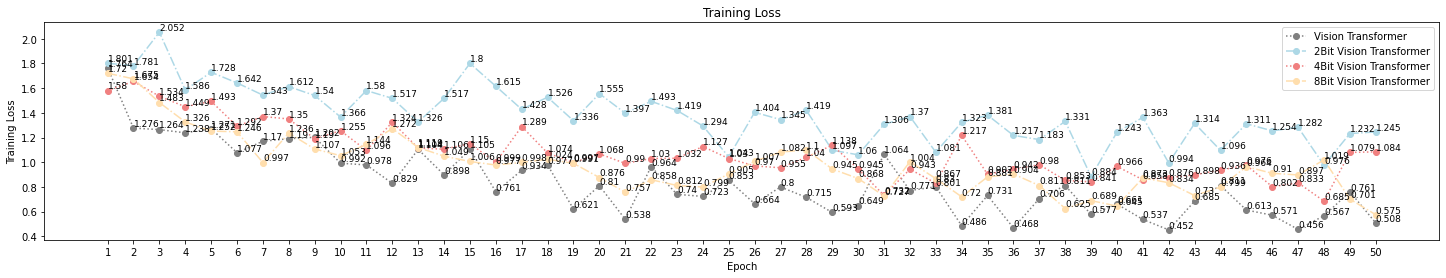

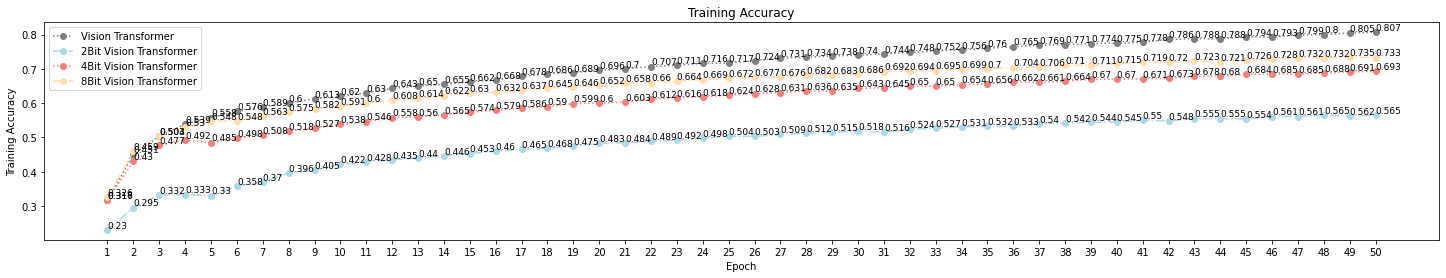

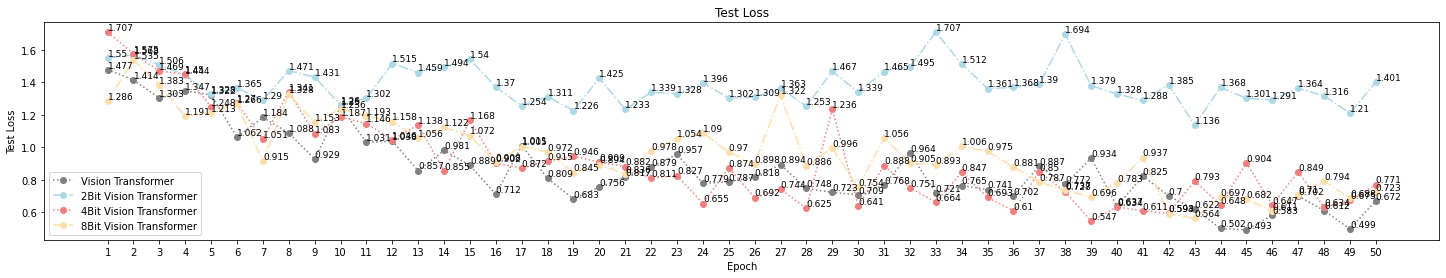

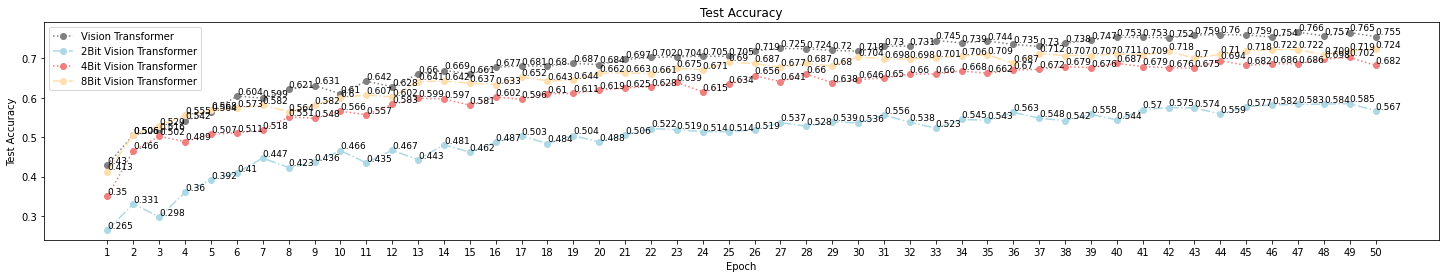

In [136]:
loss_epoch = round(vit_cifar10_log_df['Epoch'], 3)

train_loss_0 = round(vit_cifar10_log_df['Train Loss'], 3)
train_accuracy_0 = round(vit_cifar10_log_df['Train Accuracy'], 3)
test_loss_0 = round(vit_cifar10_log_df['Test Loss'], 3)
test_accuracy_0 = round(vit_cifar10_log_df['Test Accuracy'], 3)

train_loss_1 = round(quant8_vit_cifar10_log_df['Train Loss'], 3)
train_accuracy_1 = round(quant8_vit_cifar10_log_df['Train Accuracy'], 3)
test_loss_1 = round(quant8_vit_cifar10_log_df['Test Loss'], 3)
test_accuracy_1 = round(quant8_vit_cifar10_log_df['Test Accuracy'], 3)

train_loss_2 = round(quant4_vit_cifar10_log_df['Train Loss'], 3)
train_accuracy_2 = round(quant4_vit_cifar10_log_df['Train Accuracy'], 3)
test_loss_2 = round(quant4_vit_cifar10_log_df['Test Loss'], 3)
test_accuracy_2 = round(quant4_vit_cifar10_log_df['Test Accuracy'], 3)

train_loss_3 = round(quant2_vit_cifar10_log_df['Train Loss'], 3)
train_accuracy_3 = round(quant2_vit_cifar10_log_df['Train Accuracy'], 3)
test_loss_3 = round(quant2_vit_cifar10_log_df['Test Loss'], 3)
test_accuracy_3 = round(quant2_vit_cifar10_log_df['Test Accuracy'], 3)


linestyle_list = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted']
linecolor_list = ['grey', 'lightblue', 'lightcoral', 'navajowhite', 'lightgreen', 'lavender']
# https://matplotlib.org/stable/gallery/color/named_colors.html

def make_plot_text(epoch, value):
    for i, v in enumerate(epoch):
        plt.text(v, value[i], value[i], 
                fontsize = 9, color='black', ha="left",
                horizontalalignment='center', verticalalignment='bottom')  
    
plt.figure(figsize=(25, 4))
plt.plot(loss_epoch, train_loss_0, marker='o', color=linecolor_list[0], label=model_name[0], linestyle=linestyle_list[3]) 
plt.plot(loss_epoch, train_loss_1, marker='o', color=linecolor_list[1], label=model_name[1], linestyle=linestyle_list[2])  
plt.plot(loss_epoch, train_loss_2, marker='o', color=linecolor_list[2], label=model_name[2], linestyle=linestyle_list[3]) 
plt.plot(loss_epoch, train_loss_3, marker='o', color=linecolor_list[3], label=model_name[3], linestyle=linestyle_list[2]) 
plt.xlabel('Epoch'); plt.ylabel('Training Loss') 
plt.xticks(list(range(1,max(loss_epoch)+1)),[str(i) for i in range(1,max(loss_epoch)+1)])

make_plot_text(loss_epoch, train_loss_0); make_plot_text(loss_epoch, train_loss_1)
make_plot_text(loss_epoch, train_loss_2); make_plot_text(loss_epoch, train_loss_3)

plt.title('Training Loss')
plt.legend() 
plt.savefig('vit_cifar10/plot/0919/train_loss.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(25, 4))
plt.plot(loss_epoch, train_accuracy_0, marker='o', color=linecolor_list[0], label=model_name[0], linestyle=linestyle_list[3]) 
plt.plot(loss_epoch, train_accuracy_1, marker='o', color=linecolor_list[1], label=model_name[1], linestyle=linestyle_list[2])  
plt.plot(loss_epoch, train_accuracy_2, marker='o', color=linecolor_list[2], label=model_name[2], linestyle=linestyle_list[3]) 
plt.plot(loss_epoch, train_accuracy_3, marker='o', color=linecolor_list[3], label=model_name[3], linestyle=linestyle_list[2]) 
plt.xlabel('Epoch'); plt.ylabel('Training Accuracy') 
plt.xticks(list(range(1,max(loss_epoch)+1)),[str(i) for i in range(1,max(loss_epoch)+1)])

make_plot_text(loss_epoch, train_accuracy_0); make_plot_text(loss_epoch, train_accuracy_1)
make_plot_text(loss_epoch, train_accuracy_2); make_plot_text(loss_epoch, train_accuracy_3)

plt.title('Training Accuracy')
plt.legend() 
plt.savefig('vit_cifar10/plot/0919/train_accuracy.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(25, 4))
plt.plot(loss_epoch, test_loss_0, marker='o', color=linecolor_list[0], label=model_name[0], linestyle=linestyle_list[3]) 
plt.plot(loss_epoch, test_loss_1, marker='o', color=linecolor_list[1], label=model_name[1], linestyle=linestyle_list[2])  
plt.plot(loss_epoch, test_loss_2, marker='o', color=linecolor_list[2], label=model_name[2], linestyle=linestyle_list[3]) 
plt.plot(loss_epoch, test_loss_3, marker='o', color=linecolor_list[3], label=model_name[3], linestyle=linestyle_list[2]) 
plt.xlabel('Epoch'); plt.ylabel('Test Loss') 
plt.xticks(list(range(1,max(loss_epoch)+1)),[str(i) for i in range(1,max(loss_epoch)+1)])

make_plot_text(loss_epoch, test_loss_0); make_plot_text(loss_epoch, test_loss_1)
make_plot_text(loss_epoch, test_loss_2); make_plot_text(loss_epoch, test_loss_3)

plt.title('Test Loss')
plt.legend() 
plt.savefig('vit_cifar10/plot/0919/test_loss.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(25, 4))
plt.plot(loss_epoch, test_accuracy_0, marker='o', color=linecolor_list[0], label=model_name[0], linestyle=linestyle_list[3]) 
plt.plot(loss_epoch, test_accuracy_1, marker='o', color=linecolor_list[1], label=model_name[1], linestyle=linestyle_list[2])  
plt.plot(loss_epoch, test_accuracy_2, marker='o', color=linecolor_list[2], label=model_name[2], linestyle=linestyle_list[3]) 
plt.plot(loss_epoch, test_accuracy_3, marker='o', color=linecolor_list[3], label=model_name[3], linestyle=linestyle_list[2]) 
plt.xlabel('Epoch'); plt.ylabel('Test Accuracy') 
plt.xticks(list(range(1,max(loss_epoch)+1)),[str(i) for i in range(1,max(loss_epoch)+1)])

make_plot_text(loss_epoch, test_accuracy_0); make_plot_text(loss_epoch, test_accuracy_1)
make_plot_text(loss_epoch, test_accuracy_2); make_plot_text(loss_epoch, test_accuracy_3)

plt.title('Test Accuracy')
plt.legend() 
plt.savefig('vit_cifar10/plot/0919/test_accuracy.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

## Reference

**Paper**
<br/>[Vaswani et al. Attention is All You Need. NeurIPS, 2017](https://arxiv.org/abs/1706.03762)
<br/>[Alexey et al. An Image Is Worth 16x16 Words: Transformers for Image Recognition at Scale, ICLR, 2021](https://arxiv.org/abs/2010.11929)
<br/>[Hubara et al. Quantized Neural Networks: Training Neural Networks with Low Precision Weights and Activations, 2018](https://arxiv.org/abs/1609.07061)
<br/>[Yoshua Bengio et al. Estimating or propagating gradients through stochastic neurons for conditional computation. CoRR, abs/1308.3432, 2013](https://arxiv.org/abs/1308.3432)
<br/>[Alex Krizhevsky et al. Learning Multiple Layers of Features from Tiny Images. 2009.](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf)

<br/>**Github**
<br/>[Huggingface Vision Transformers](https://github.com/huggingface/pytorch-image-models/blob/main/timm/models/vision_transformer.py)
<br/>[Andrew-Tierno/QuantizedTransformer](https://github.com/Andrew-Tierno/QuantizedTransformer)